***Group 21***
- Jiaming Chang
- Qianluo Zhu

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline

print("packages imported")

packages imported


## **Problem Statement**:  

Develop a model of the charging cost, when we have information about battery capacity, energy consumed, charging duration, charging rate, and distance driven

## **Variables and parameters**:  


| Description | Symbol | Dimensions | Type | Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| regression coefficent for intercept | $\beta_0$ | - | parameter | regression coefficent for intercept | $\beta_6$ | - | parameter |
| Battery Capacity | $X_1$ | - | variable | Battery Capacity | $X_7$ | - | variable |
| regression coefficient for Battery Capacity| $\beta_1$ | -| parameter | regression coefficient for Battery Capacity| $\beta_7$ | -| parameter |
| Energy Consumed | $X_2$ | -| variable | charging_rate_mod | $X_8$ | -| variable |
| regression coefficient for Energy Consumed | $\beta_2$ | - | parameter | regression coefficient for charging_rate_mod | $\beta_8$ | - | parameter |
| Charging Duration | $X_3$ | - |  variable | distance_mod  | $X_9$ | - |  variable |
| regression coefficient for Charging Duration | $\beta_3$ | -| parameter | regression coefficient for distance_mod | $\beta_9$ | -| parameter |
| Charging rate | $X_4$ | - |  variable | Total energy | $X_{10}$ | - |  variable |
| regression coefficient for Charging rate | $\beta_4$ | - | parameter | regression coefficient for Total energy | $\beta_{10}$ | -| parameter |
| distance driven | $X_5$ | - | variable | error | $\epsilon$ | - | variable |
| regression coefficient for distance driven | $\beta_5$ | - | parameter | Charging cost | $Y$ | - | variable | 
| Charging cost | $Y$ | - | variable | 
| error | $\epsilon$ | - | variable |


In the two tables above, the parameters selected for the table on the left are the original parameters of the data, and the parameters for the table on the right are the parameters transformed.

## **Assumptions and Constraints:**  


- the original model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \varepsilon$
- the transformed model follows the linear model $Y = \beta_6 + \beta_7 X_7 + \beta_8 X_8 + \beta_9 X_9 + \beta_{10} X_{10} + \varepsilon$
- the average value of the error is 0: i.e., $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- the variance of the error is constant: i.e., $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- the error is independent for each $\epsilon_i$ for all $i$
- owners would charge their batteries to full.
- the data is measured accurately

## **Build Solutions:**  

The following transformations are performed in the Transformed model:
- Taking the square root of the Distance Driven values.
- Creating a new variable called Total Energy, which is the multiplication of the Charging Duration values with the Energy Consumed values.
- Taking the natural log of the Charging Rate.

In [2]:
# import data
ev = pd.read_csv("ev_charging_NY.csv")
ev = pd.DataFrame(ev)
ev.head()

# modifications
# Taking the square root of the Distance Driven values;
# Creating a new variable called Total Energy = Charging Duration * Energy Consumed
# Taking the natural log of the Charging Rate.
ev["distance_mod"] = np.sqrt(ev['Distance_Driven'])
ev["total_energy"] = ev["Charging_Duration"]*ev["Energy_Consumed"]
ev["charging_rate_mod"] = np.log(ev["Charging_Rate"])
ev.head()

,Battery_Capacity,Energy_Consumed,Charging_Duration,Charging_Rate,Distance_Driven,Charging_cost,distance_mod,total_energy,charging_rate_mod
0,50.0,19.402524,2.052874,5.010838,111.922903,11.16,10.579362,39.830931,1.611603
1,75.0,50.530531,1.028886,34.636271,62.529153,21.22,7.907538,51.990138,3.544901
2,75.0,4.288320,2.459856,38.841667,107.396907,17.57,10.363248,10.548651,3.659494
3,100.0,77.295780,0.684295,5.971665,86.456851,13.18,9.298218,52.893128,1.787026
4,50.0,8.112448,1.652458,37.291554,286.342818,17.63,16.921667,13.405483,3.618767


In [3]:
X1 = ev[['Battery_Capacity',"charging_rate_mod",'distance_mod','total_energy']]
Y1 = ev['Charging_cost']
X1 = sm.add_constant(X1)

reg_1 = sm.OLS(Y1,X1).fit()

summary_table=reg_1.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.430e+04
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          2.32e-234
Time:                        05:19:55   Log-Likelihood:                -110.36
No. Observations:                 195   AIC:                             230.7
Df Residuals:                     190   BIC:                             247.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6660      0.22

In [4]:
X2 = ev[['Battery_Capacity',"Energy_Consumed",'Charging_Duration','Charging_Rate','Distance_Driven']]
Y2 = ev['Charging_cost']
X2 = sm.add_constant(X2)

reg_2 = sm.OLS(Y2,X2).fit()

summary_table=reg_2.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:          Charging_cost   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     356.1
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           3.90e-94
Time:                        05:19:58   Log-Likelihood:                -438.64
No. Observations:                 195   AIC:                             889.3
Df Residuals:                     189   BIC:                             908.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5538      1.04

The result shows that if modelling on the features given, there is a high probability of having strong multicollinearity or other problems with the model. 

So we switch to model on the modified features.

## **Analyze and Assess:**

All of the partial regression plots for each model passes the point(0,0). This means that both models are similar to linear relationships, which is consistent with our initial assumptions.  It is worth noticing that the plot for Battery capacity and distance does not resemble strong linear relationship. 

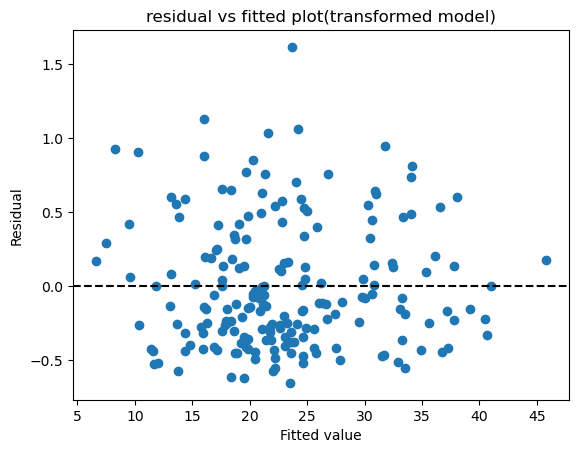

In [8]:
## variance is constant

## residual vs fitted plot 

#pull out fitted values from regression
fitted_y = reg_1.fittedvalues

residuals = reg_1.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.title('residual vs fitted plot(transformed model)')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

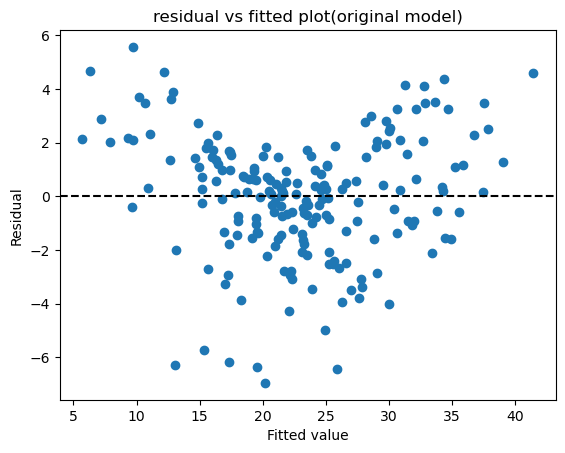

In [9]:
## variance is constant

## residual vs fitted plot 

#pull out fitted values from regression
fitted_y = reg_2.fittedvalues

residuals = reg_2.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.title('residual vs fitted plot(original model)')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

Residual vs fitted plot of the two models were compared. It can be found that the transformed model image is closer to the random distribution of each data point around the axis y=0, which means that the transformed model is consistent with the hypothesis of variance of the error is constant. As for the graphics of the original model, there is an obvious pattern. This means that the original model is violating the assumption that the variance is constant.

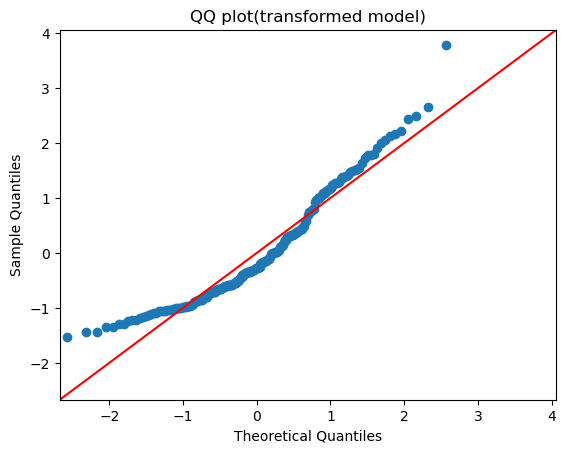

In [12]:
## Errors are normally distributed

## normal QQ plot

## pull out residuals from the model fitting
residuals = reg_1.resid

sm.qqplot(residuals,fit=True, line="45")
plt.title('QQ plot(transformed model)')
plt.show()

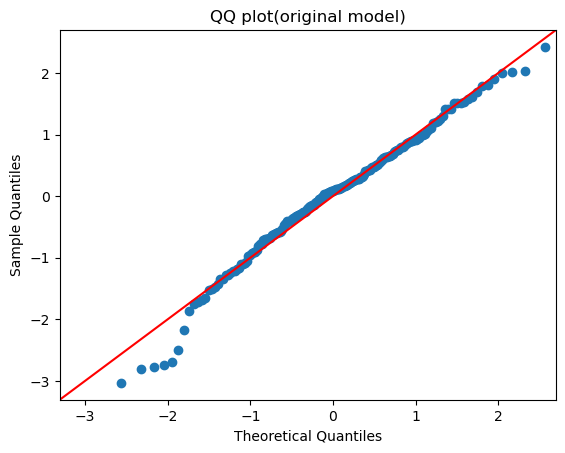

In [13]:
residuals = reg_2.resid

sm.qqplot(residuals,fit=True, line="45")
plt.title('QQ plot(original model)')
plt.show()

Comparing the QQ plot of the two models, it can be found that there are some deviations from normal in both of them, especially in the tail (lower quantile). This phenomenon appears in both models at the same time, which may indicate that the errors in both models do not follow a normal distribution.

## **Conclusion and Report**


We built a linear model to predict the relationship between the charging cost and the various parameters of this vehicle volume. We draw a linear model based on the data for each parameter. And draw two different models to compare, in order to get a better model. The first model we use is the original variable data, the second model is the transformed model. The $R^2_{adj}$, residual vs fitted plot and QQ plot of the two models were compared. It can be argued that the transformed model is the better model. Because transformed models have higher $R^2$ and $R^2_{adj}$, this means the data fits the model better. Residual vs fitted plot and QQ plot are more in line with the original hypothesis of linear regression, which makes the fitting of this model more reasonable. The residual vs fitted plot of the other model showed obvious patten, thus violating the assumption of linear regression.

A feasible way to further optimize the model is to split the data into test sets and training sets. In this way, the prediction accuracy and fitting degree of the model can be further verified. This model can be analyzed and optimized in greater depth.